### Portfolio Optimization 

---

$r$ - Net Return 


$R$ - Gross Return  $R_i \geq 0 \quad R_i = 1 + r_i$


$w$ - Investment Weights $\sum w_i = 1$





Expcted Return on Investment $\quad \mathbb{E}\big[w'R\big] = w'\mu$



$$
Var\big(w'R\big) = 
w'Var\big(\sum^n R_i\big)w
= w' \bigg(\sum^n_{i=1}Var\big(R_i\big) + \sum^n_{i \neq j} Cov\big(R_i,R_j\big)\bigg)w
$$ 

$$
w' \bigg(\sum^n_{i=1}Var\big(R_i\big) + 2\sum^n_{i<j} Cov\big(R_i,R_j\big)\bigg)w =
w' \bigg(\sum^n_{i=1}Var\big(R_i\big) + 2\sum^n_{i<j} Cov\big(R_i,R_j\big)\bigg)w
$$

$$
=\sum_{i,j}w_iw_j\sigma_{ij} \qquad
$$

Varience of the Investment - $w' \Sigma w$


---


The minimum Varience Portfolio Derivation


To find the optimal weights for this portfolio we will use Lagrange optimization with one constraint that the weights of the portfolio must sum to 1.


min $w' \Sigma w$ constraint $\iota 'w = 1$


$$
L = w' \Sigma w - \lambda(\iota 'w - 1)
$$

$$
\nabla_w L = 2\Sigma w - \lambda \iota = 0 \; ; w \qquad
2\Sigma w = \lambda \iota \qquad
w = \frac{\lambda}{2}\Sigma^{-1}\iota
$$


Remove Lambda starting by left multiplying $\iota'$


$$
\iota'w = 1 = \frac{\lambda}{2}\iota'\Sigma^{-1}\iota \; ;\lambda \quad
\lambda = \frac{2}{\iota'\Sigma^{-1}\iota}
$$

Sub out Lambda

$$
w = \frac{\Sigma^{-1}\iota}{\iota'\Sigma^{-1}\iota}
$$

---

Max Sharpe Derovation.


This portfolio maximizes reward per unit of risk; $\frac{\mu'w}{\sqrt{w'\Sigma'w}}$. Given the constraint that the weights of the portfolio must sum to one; $\iota'w=1$. To make solving for wights eaiser a change of variables is necessary $x := \frac{w}{\sqrt{w'\Sigma'w}}$, now goal is to maximize $x\mu'$, and $w$ needs to be removed from the constraint aswell

$$
x'\Sigma x =
\frac{w'}{\sqrt{w'\Sigma'w}}\Sigma\frac{w}{\sqrt{w'\Sigma'w}} =
\frac{w'\Sigma'w}{w'\Sigma'w} =
1 =
\iota'w
$$


max $x\mu'$ constraint $x'\Sigma x = 1$


$$
L = \mu'x - \lambda\big(x'\Sigma x - 1)
$$

$$
\nabla_x L = \mu - 2\lambda\Sigma x = 0  \; ; x, \qquad
 2\lambda\Sigma x = \mu, \quad
 x = \frac{1}{2\lambda}\Sigma^{-1}\mu
$$

Substitute x back out of the equation

$$
\frac{w}{\sqrt{w'\Sigma'w}} = \frac{1}{2\lambda}\Sigma^{-1}\mu , \quad
w = \frac{\sqrt{w'\Sigma'w}}{2\lambda}\Sigma^{-1}\mu
$$

Remove Lambda


$$
\iota'w = 1 = \frac{\sqrt{w'\Sigma'w}}{2\lambda}\iota'\Sigma^{-1}\mu \quad
\lambda = \frac{\sqrt{w'\Sigma'w}\iota'\Sigma^{-1}\mu}{2}
$$


$$
w = \frac{2}{\sqrt{(w'\Sigma'w)}\iota'\Sigma^{-1}\mu}\frac{1}{2}\sqrt{(w'\Sigma'w)}\iota'\Sigma^{-1}\mu
$$


$$
w = \frac{\Sigma^{-1}\mu}{\iota'\Sigma^{-1}\mu}
$$

---

Multiple Constraints


Minimize $w'\Sigma w$ with constraints $\iota'w =1 \;\; \mu'w=m$

$$
L = w'\Sigma w - \lambda\big(\iota'w-1\big)-\eta\big(\mu'w-m\big)
$$

$$
\nabla_w L = 2\Sigma w - \lambda \iota - \eta \mu = 0 \: ;w \quad 
w = \frac{\lambda}{2}\Sigma^{-1}\iota  + \frac{\eta}{2}\Sigma^{-1}\mu
$$

This looks like it could be a linear combination of the two previous portfolios

$$
w = \frac{\lambda \big(\iota'\Sigma\iota\big)}{2} \cdot \frac{\Sigma^{-1}\iota}{\iota'\Sigma^{-1}\iota} + \frac{\eta \big(\iota'\Sigma^{-1}\mu\big)}{2}\cdot\frac{\Sigma^{-1}\mu}{\iota'\Sigma^{-1}\mu}
$$


Let 
$$
\alpha = \frac{\lambda \big(\iota'\Sigma\iota\big)}{2}\quad 
\beta = \frac{\eta \big(\iota'\Sigma^{-1}\mu\big)}{2}\quad
w^1 = \frac{\Sigma^{-1}\iota}{\iota'\Sigma^{-1}\iota}\quad
w^2 = \frac{\Sigma^{-1}\mu}{\iota'\Sigma^{-1}\mu}
$$

Now we have a linear combination of the two Portfolios Minimum Variance and Max Sharpe.

$$
w = \alpha \cdot w^1 + \beta \cdot w^2
$$


or even better

$$
w = \alpha \cdot w^1 + \big(1 - \alpha) \cdot w^2 =
w^2 + \alpha\big(w^1 - w^2\big)
$$

$$
w =  w^2 + \alpha\big(w^1 - w^2\big)
$$

Now using the constraint $\mu'w=m$ we can solve for alpha

$$
\mu'w = m = \mu w^2 + \alpha \mu \big(w^1 - w^2\big)
$$

$$
\alpha \mu \big(w^1 - w^2\big) = m - \mu w^2
$$

$$
\alpha = \frac{m - \mu w^2}{\mu \big(w^1 - w^2\big)}
$$

In [467]:
using LinearAlgebra
using Plots

In [456]:
#Made Up Data
n = 4
𝜄 = ones(n)
M = rand(n,n)
Σ = [
    0.75 0.2 -0.1 0.5;
    0.2 0.7 0.1 0.3;
    -0.1 0 1.5 0;
    0.5 0.1 0.3 1;
]
std = [sqrt(i) for i in diag(Σ)]
𝜇 = [0.03;0.02;0.05;0.04]
m = 0.02;

In [459]:
#Min Var and Max Sharpe
w1 =  1/(𝜄'*inv(Σ)*𝜄) * (inv(Σ)* 𝜄);
w2 = 1/(𝜄'*inv(Σ)*𝜇) * (inv(Σ)* 𝜇);

In [464]:
#Making the Bullet
f(a) = w2 + (a - 𝜇'*w2)/(𝜇'*(w1-w2)) * (w1 - w2)
xi = [0:0.001:0.1;]

x = zeros(length(xi))
y = zeros(length(xi))
for i in 1:length(xi)
    wi = f(xi[i])
    x[i] = sqrt(wi'*Σ*wi)
    y[i] = wi'𝜇
    
end

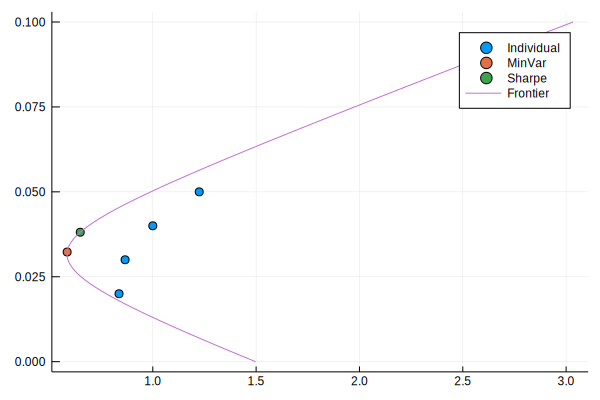

In [466]:
scatter(std,𝜇,label="Individual")
scatter!([sqrt(w1'*Σ*w1)],[w1'𝜇],label="MinVar")
scatter!([sqrt(w2'*Σ*w2)],[w2'𝜇],label="Sharpe")
plot!(x,y,label="Frontier")